# Кічак Богдан Володимирович, група КН22004бск, варіант 4

### 1. Створити програму для генерації довільного масиву із 44 цілих чисел, які не перевищують по модулю 64,  з наступними властивостями:
1. При кожному запуску програми масив повинен бути різним.
2. Від'ємних елементів в масиві повинно бути від 40 до 60 відсотків.
1. Масив повинен містити не більше 25 відсотків непарних по значенню елементів (розташованих в довільних місцях).

In [17]:
code = """
import random

def generate_array():
    array = []

    # Генеруємо від'ємні елементи (40-60%)
    num_negative = random.randint(18, 26)  # 44 * 0.4 та 44 * 0.6
    for _ in range(num_negative):
        array.append(-random.randint(1, 64))

    # Генеруємо решту парних додатніх елементів
    num_positive_even = 44 - num_negative

    # Генеруємо непарні елементи (до 25%)
    num_odd = min(num_positive_even, random.randint(11, 12))  # До 25%, але не більше, ніж залишилось для парних
    for _ in range(num_odd):
        array.append(random.choice([x for x in range(1, 65) if x % 2 != 0]))

    # Заповнюємо решту місць парними додатніми числами
    for _ in range(num_positive_even - num_odd):
        array.append(2 * random.randint(1, 32))  # Генеруємо парні додатні числа

    # Перемішуємо елементи у масиві, щоб вони були у випадковому порядку
    random.shuffle(array)

    return array

# Генеруємо масив
my_array = generate_array()

# Друкуємо результат
print(my_array)
"""

# Збереження коду у файл з ім'ям "my_module.py" з кодуванням UTF-8
with open("my_module.py", "w", encoding="utf-8") as file:
    file.write(code)

### 2. Зберегти згенерований масив в файл. 

In [18]:
import json

# Імпортуємо функцію з модуля
from my_module import generate_array

# Викликаємо функцію для генерації масиву
result_array = generate_array()

# Зберігаємо згенерований масив в файл "random_array.json"
with open("random_array.json", "w") as file:
    json.dump(result_array, file)


### Вивід створеного масиву

In [19]:
import json

# Зчитуємо збережений JSON-файл "random_array.json"
with open("random_array.json", "r") as file:
    loaded_array = json.load(file)

# Виводимо вміст JSON-файлу без переносів рядків
print(json.dumps(loaded_array, separators=(",", ":")))


[-45,-48,48,34,45,-34,-60,53,42,-31,16,-18,-45,44,59,-55,28,-39,47,-38,-32,-46,-17,-11,15,-27,22,27,63,-19,31,-18,48,18,-18,-29,41,31,59,24,24,39,-58,-32]


### Візуалізувати масив за допомогою точкової діаграми. Виділити кольором вершини, які відповідають непарним (по значенню) елементам, а також вказати ці значення на діаграмі. Виділити іншим кольором вершини, які відповідають від’ємним елементам.  (Точки повинні бути не менше 5 пікселів в діаметрі) 

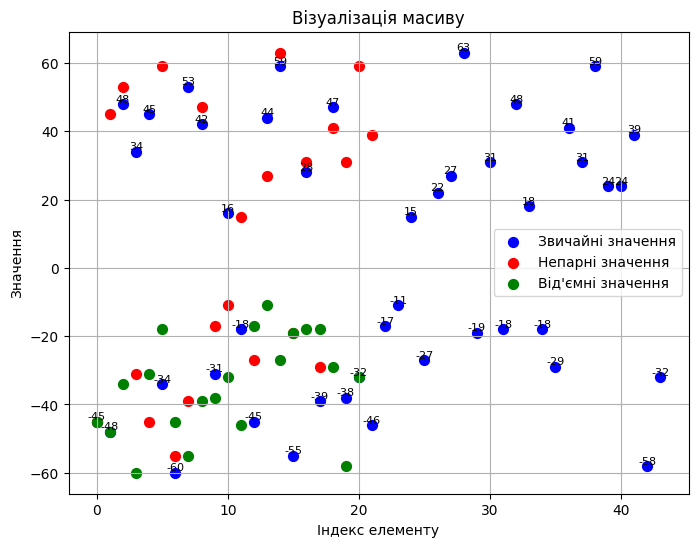

In [20]:
import matplotlib.pyplot as plt

# Зчитуємо збережений JSON-файл "random_array.json"
with open("random_array.json", "r") as file:
    loaded_array = json.load(file)

# Роздільні масиви для непарних і від'ємних елементів
odd_values = [x for x in loaded_array if x % 2 != 0]
negative_values = [x for x in loaded_array if x < 0]

# Візуалізація точкової діаграми
plt.figure(figsize=(8, 6))
plt.scatter(range(len(loaded_array)), loaded_array, s=50, c='b', label='Звичайні значення')
plt.scatter(range(len(odd_values)), odd_values, s=50, c='r', label='Непарні значення')
plt.scatter(range(len(negative_values)), negative_values, s=50, c='g', label='Від\'ємні значення')

# Додавання підписів до точок
for i, value in enumerate(loaded_array):
    plt.annotate(str(value), (i, value), fontsize=8, ha='center', va='bottom')

# Налаштування відображення графіку
plt.xlabel('Індекс елементу')
plt.ylabel('Значення')
plt.title('Візуалізація масиву')
plt.legend()
plt.grid(True)

plt.show()


### 5. Порахувати кількість та середнє значення елементів масиву з непарними значеннями. 

In [21]:
# Зчитуємо збережений JSON-файл "random_array.json"
with open("random_array.json", "r") as file:
    loaded_array = json.load(file)

# Відфільтровуємо непарні значення
odd_values = [x for x in loaded_array if x % 2 != 0]

# Кількість непарних значень
count_of_odd_values = len(odd_values)

# Середнє значення непарних значень
average_of_odd_values = sum(odd_values) / count_of_odd_values if count_of_odd_values > 0 else 0

# Виводимо результат
print(f"Кількість непарних значень: {count_of_odd_values}")
print(f"Середнє значення непарних значень: {average_of_odd_values:.2f}")

Кількість непарних значень: 22
Середнє значення непарних значень: 8.73


### 6. Порахувати суму та кількість елементів масиву, розташованих між першим і останнім від’ємними елементами. 

In [22]:
# Зчитуємо збережений JSON-файл "random_array.json"
with open("random_array.json", "r") as file:
    loaded_array = json.load(file)

# Знайдемо індекси першого та останнього від'ємного елемента
first_negative_index = None
last_negative_index = None

for i, value in enumerate(loaded_array):
    if value < 0:
        if first_negative_index is None:
            first_negative_index = i
        last_negative_index = i

# Якщо є хоча б один від'ємний елемент
if first_negative_index is not None:
    # Вирізаємо підмасив між першим і останнім від'ємними елементами
    sub_array = loaded_array[first_negative_index+1:last_negative_index]

    # Кількість елементів у підмасиві
    count_of_elements = len(sub_array)

    # Сума елементів у підмасиві
    sum_of_elements = sum(sub_array)

    print(f"Кількість елементів між першим і останнім від'ємними: {count_of_elements}")
    print(f"Сума елементів між першим і останнім від'ємними: {sum_of_elements}")
else:
    print("У масиві немає від'ємних елементів.")

Кількість елементів між першим і останнім від'ємними: 42
Сума елементів між першим і останнім від'ємними: 215


### 7. Стиснути масив, видаливши елементи, які менше заданого користувачем числа. Елементи, щозвільнилися в кінці масиву, заповнити нулями. Вивести отриманий масив та його графічну діаграмуна екран. Задане користувачем число відобразити лінією.

Отриманий масив:
[ 0  0 48 34 45  0  0 53 42  0 16  0  0 44 59  0 28  0 47  0  0  0  0  0
 15  0 22 27 63  0 31  0 48 18  0  0 41 31 59 24 24 39  0  0]


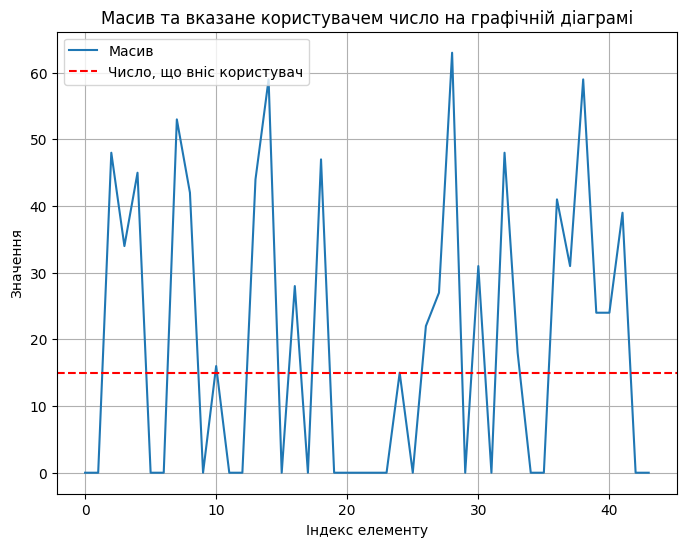

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Зчитуємо збережений JSON-файл "random_array.json"
with open("random_array.json", "r") as file:
    loaded_array = json.load(file)

# Користувач вводить число, менше якого елементи будуть видалені
user_input = float(input("Введіть число: "))

# Створюємо новий масив, в якому менше числа заповнюються нулями
filtered_array = np.where(np.array(loaded_array) >= user_input, loaded_array, 0)

# Виводимо отриманий масив
print("Отриманий масив:")
print(filtered_array)

# Відобразимо масив і вказане число на графічній діаграмі
plt.figure(figsize=(8, 6))
plt.plot(range(len(filtered_array)), filtered_array, label='Масив')
plt.axhline(y=user_input, color='r', linestyle='--', label='Число, що вніс користувач')
plt.xlabel('Індекс елементу')
plt.ylabel('Значення')
plt.title('Масив та вказане користувачем число на графічній діаграмі')
plt.legend()
plt.grid(True)

plt.show()
